/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)




----------------------------------------




/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'elsewh', 'everywh', 'ind', 'otherwi', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Number of articles within the TRAIN Dataset: 4732
Number of Features (unique words) in TRAINING dataset (After Processing): 10847
Shape of TRAINING document-count-matrix: (4732, 10847)
Shape of TRAINING TF-IDF Matrix: (4732, 10847)


----------------------------------------


Number of articles within the TEST Dataset: 3150
Number of Features (unique words) in TEST dataset (After Processing): 10847
Shape of TEST document-count-matrix: (3150, 10847)
Shape of TEST TF-IDF Matrix: (3150, 10847)


----------------------------------------


Shape of reduced TRAIN tf-idf matrix after NMF Dimensionality Reduction (top 50 words): (4732, 50)
Shape of reduced TEST tf-idf matrix after NMF Dimensionality Reduction (top 50 words): (4732, 50)
Names of the 8 News categories: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
Values of the 8 News categories: [6 7 4 ... 6 6 2]

 Class

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


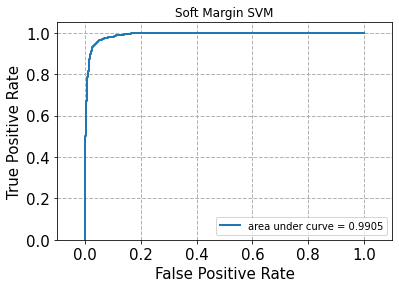



----------------------------------------


############## Hard Margin Stats: ############### 

Accuracy: 0.9692063492063492
Precision: 0.9739682539682539
Recall: 0.9647798742138365
Confusion Matrix: 
[[1519   41]
 [  56 1534]]
F1-score: 0.9693522906793048


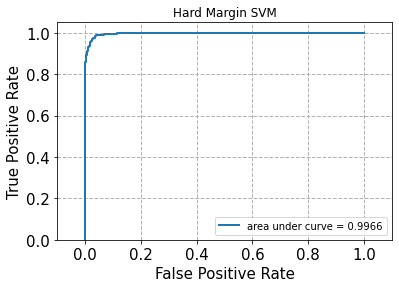



----------------------------------------


Hyper parameter values that will be tested: 
{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


----------------------------------------




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Settings of the Grid Seach: 
GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
Data available in grid_search object: 
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


---------------------------------

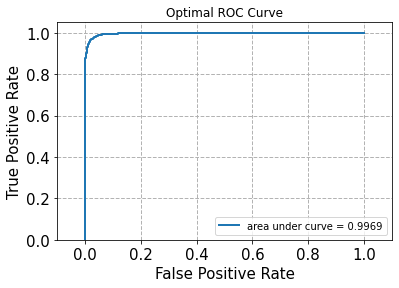

In [1]:
# Have to pip3 install <packages> on local machine before import.
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words
%matplotlib inline

#######################################################
#### Define Custom preprocessor for CountVectorizer ###
#######################################################

def my_custom_preprocessor(doc_string):
    # do all data preprocessing here
    
    # Lower case
    doc_string=doc_string.lower()
    
    # Remove Numbers
    remove_digits = str.maketrans('', '', digits)
    doc_string.translate(remove_digits)
    
    # Convert to tokenized form....
    tokens = nltk.tokenize.word_tokenize(doc_string)
    # Iterate through list of tokens (words) and remove all numbers
    tokens = [word for word in tokens if word.isalpha()]
    # Iterate through list of tokens (words) and stem (shorten) each word
    port_stemmer = PorterStemmer()
    tokens = [port_stemmer.stem(words) for words in tokens ]
    
    ###############################
    #### Lemmatize with pos_tag ###
    ###############################
    
    lemmatizer = WordNetLemmatizer()
    
    # Convert between two different tagging schemes
    def change_tags(penntag):
        morphy_tag = {'NN':'n', 'JJ':'a',
                      'VB':'v', 'RB':'r'}
        try:
            return morphy_tag[penntag[:2]]
        except:
            return 'n'
        
    tokens = [lemmatizer.lemmatize(word.lower(), pos=change_tags(tag)) for word, tag in pos_tag(tokens)]
    
    # Rejoin List of tokens and return that single document-string
    return ' '.join(tokens)


#####################################################
#### Define Custom stop words for CountVectorizer ###
#####################################################

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

# Run stop_words through the same pre-processor as the document-matrix
# This will apply stemmed/lemmatized stop_woirds to stemmed/lemmatized tokenized document lists
def process_stop_words(stop_word_set):
    doc_string = ' '.join(stop_word_set)
    return my_custom_preprocessor(doc_string).split()

#############################
#### Problem #4 Execution ###
#############################

# Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
print("\n\n" + '-'*40 + "\n\n")

# Define the CountVectorizer = document-term matrix
train_count_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
test_count_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))

# Fit + count the train_doc_term_matrix: setting the vocabulary (word-features) based on words found in the train_dataset
train_doc_term_matrix = train_count_vectorizer.fit_transform(train_dataset.data)

# Fit the test_count_doc_term_matric to train_dataset words; then count the occurence of those words in the test_dataset
test_count_vectorizer.fit(train_dataset.data)
test_count_doc_term_matrix = test_count_vectorizer.transform(test_dataset.data)

# Start TD-DIF Transform process; created TDIF matrix with train_doc_term_matrix vocabulary; apply test_dataset transform
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_doc_term_matrix)
test_tfidf = tfidf_transformer.fit_transform(test_count_doc_term_matrix)

print("Number of articles within the TRAIN Dataset: " + str(len(train_dataset.filenames)))
print("Number of Features (unique words) in TRAINING dataset (After Processing): "+ str(len(train_count_vectorizer.get_feature_names())))
print("Shape of TRAINING document-count-matrix: " + str(train_doc_term_matrix.shape))
print("Shape of TRAINING TF-IDF Matrix: " + str(train_tfidf.shape))
print("\n\n" + '-'*40 + "\n\n")

print("Number of articles within the TEST Dataset: " + str(len(test_dataset.filenames)))
print("Number of Features (unique words) in TEST dataset (After Processing): "+ str(len(test_count_vectorizer.get_feature_names())))
print("Shape of TEST document-count-matrix: " + str(test_count_doc_term_matrix.shape))
print("Shape of TEST TF-IDF Matrix: " + str(test_tfidf.shape))
print("\n\n" + '-'*40 + "\n\n")

##############################
## Dimensionality Reduction ##
##############################
# Only need on SVD Model, Choosing NMF
from sklearn.decomposition import NMF

nmf_settings = NMF(n_components=50, init='random', random_state=0)
reduced_NMF_train_matrix = nmf_settings.fit_transform(train_tfidf)
reduced_NMF_test_matrix = nmf_settings.transform(test_tfidf)

nmf_settings_components = nmf_settings.components_
print("Shape of reduced TRAIN tf-idf matrix after NMF Dimensionality Reduction (top 50 words): " + str(reduced_NMF_train_matrix.shape))
print("Shape of reduced TEST tf-idf matrix after NMF Dimensionality Reduction (top 50 words): " + str(reduced_NMF_train_matrix.shape))

#######################
#### Classification ###
#######################
from sklearn.svm import LinearSVC

#########################################
#### Map Categories to Binary Classes ###
#########################################

# Categorize the 8 news categories ['comp.graphics', 'comp.os.ms-windows.misc',... 'rec.sport.baseball', 'rec.sport.hockey'] 
# into binary classes (0: computer_technology , 1: recreational_activity)

training_data_class = [] 
test_data_class = []

# Categories values are mapped [0, 1, ..., 7]; [0-3] = computer_technology, [4-7] = recreational_activity
print("Names of the 8 News categories: " + str(train_dataset.target_names))
print("Values of the 8 News categories: " + str(train_dataset.target))

# Create an 'truth' array: size = (1 x #_of_articles_in_train_dataset); 
# values in array are either 0 or 1; 
# corresponding to computer_technology/recreational_activity classes.
for category in train_dataset.target:
    if category < 4:
        training_data_class.append(0)
    else:
        training_data_class.append(1)
        
# Create an 'truth' array: size = (1 x #_of_articles_in_test_dataset); 
# values in array are either 0 or 1; 
# corresponding to computer_technology/recreational_activity classes.
for category in test_dataset.target:
    if category < 4:
        test_data_class.append(0)
    else:
        test_data_class.append(1)

# Sanity Check: Values be either 0 = computer_technology OR 1 = recreational_activity
print("\n Classification (0 or 1) of the first 10 news-articles in train_dataset: " + str(training_data_class[0:10]))
print("\n Classification (0 or 1) of the first 10 news-articles in test_dataset: " + str(test_data_class[0:10]))
print("\n\n" + '-'*40 + "\n\n")

############################################
#### Perform Predictions using LinearSVC ###
############################################

## Calculate Linear SVC with Soft Margin, Use BINARY CLASSIFICATION (two classes: 0 or 1)
soft_margin_svm = LinearSVC(loss='hinge',C=0.0001).fit(reduced_NMF_train_matrix, training_data_class)
soft_margin_svm_prediction = soft_margin_svm.predict(reduced_NMF_test_matrix)

## Calculate Linear SVC with Hard Margin, Use BINARY CLASSIFICATION (two classes: 0 or 1)
hard_margin_svm = LinearSVC(loss='hinge',C=1000).fit(reduced_NMF_train_matrix, training_data_class)
hard_margin_svm_prediction = hard_margin_svm.predict(reduced_NMF_test_matrix)

####################################
#### Analyze the Data (Function) ###
####################################

from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr, title):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    
    ax.legend(loc="lower right")
    ax.title.set_text(title)

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

    plt.ion()
    plt.show()
    plt.pause(0.001)

##################################
#### Analyze the Data: Numbers ###
##################################

#################################### Soft Margin SVM ##########################
s_accuracy = metrics.accuracy_score(test_data_class, soft_margin_svm_prediction)
s_precision = metrics.precision_score(test_data_class, soft_margin_svm_prediction)
s_recall = metrics.recall_score(test_data_class, soft_margin_svm_prediction)
s_f1 = 2 * (s_precision * s_recall) / (s_precision + s_recall)
print("############## Soft Margin Stats: ############### \n")
print("Accuracy: " + str(s_accuracy))
print("Precision: " + str(s_precision))
print("Recall: " + str(s_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, soft_margin_svm_prediction)))
print("F1-score: "+ str(s_f1))

# ROC Curve
dec_function_score = soft_margin_svm.decision_function(reduced_NMF_test_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr, 'Soft Margin SVM')
print("\n\n" + '-'*40 + "\n\n")  

#################################### Hard Margin SVM ##########################
h_accuracy = metrics.accuracy_score(test_data_class, hard_margin_svm_prediction)
h_precision = metrics.precision_score(test_data_class, hard_margin_svm_prediction)
h_recall = metrics.recall_score(test_data_class, hard_margin_svm_prediction)
h_f1 = 2 * (h_precision * h_recall) / (h_precision + h_recall)
print("############## Hard Margin Stats: ############### \n")
print("Accuracy: " + str(h_accuracy))
print("Precision: " + str(h_precision))
print("Recall: " + str(h_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, hard_margin_svm_prediction)))
print("F1-score: "+ str(h_f1))

# ROC Curve
dec_function_score = hard_margin_svm.decision_function(reduced_NMF_test_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr, 'Hard Margin SVM')
print("\n\n" + '-'*40 + "\n\n")  

#########################
#### Cross Validation ###
#########################
import math 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Defining a generic LinearSVC() object that will be cross-validated by grid_search()
trained_SVC = LinearSVC().fit(reduced_NMF_train_matrix, training_data_class)

# Defining how to split the data set; k-fold, k=5
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Create a Dictionary with key 'C' and value [10^-3  < k < 3]
hyper_param_range = {'C': [math.pow(10, k) for k in range(-3,4)]}
print("Hyper parameter values that will be tested: \n" + str(hyper_param_range))
print("\n\n" + '-'*40 + "\n\n")  

############## Hyper Parameter Tuning ########################
# Predict the classification (0: computer_technology OR 1: recreational_activity) for every article in the test_dataset.
# Vary the value of hyper_param 'C'; Find the best value for 'C' (Most accurate).
# grid_search() will run predictions for every combination of k-fold (5) and vary the values of hyper_param 'C' (7) for each fold.
# (5) * (7) = 35 predictions will be run by grid_seach(); returns the value of 'C' that is most accurate. 

# Define grid_search_search()
grid_search = GridSearchCV(trained_SVC, hyper_param_range, cv=5, scoring='accuracy')

# Run the iterations of K-folds * hyper_param_range; Judge 'best' based on accuracy
grid_search.fit(reduced_NMF_train_matrix, training_data_class)
print("Settings of the Grid Seach: \n" + str(grid_search))
print("Data available in grid_search object: \n" + str(grid_search.cv_results_.keys()))
print("\n\n" + '-'*40 + "\n\n")  

# Print out tested parameter values (C=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]) vs. mean vs. std
grid_mean = grid_search.cv_results_['mean_test_score']
grid_std =  grid_search.cv_results_['std_test_score']
grid_params =  grid_search.cv_results_['params']

print("Average Accuracy vs. C-value: \n")
for mean, standard_dev, hyper_param_values in zip(grid_mean,grid_std,grid_params):
    print("Mean: " + str(mean) + "    std: " + str(standard_dev) + "   C: " + str(hyper_param_values))
print("\n\n" + '-'*40 + "\n\n")  

# Use best value of 'C' to run an 'optimal' prediction ( C=100 had best results)
optimal_svm = LinearSVC(loss='hinge',C=100).fit(reduced_NMF_train_matrix, training_data_class)
optimal_prediction = optimal_svm.predict(reduced_NMF_test_matrix)

# Plot stats for best prediction:
optimal_accuracy = metrics.accuracy_score(test_data_class, optimal_prediction)
optimal_precision = metrics.precision_score(test_data_class, optimal_prediction)
optimal_recall = metrics.recall_score(test_data_class, optimal_prediction)
optimal_f1 = 2 * (h_precision * h_recall) / (h_precision + h_recall)
print("############## Optimal C-value Stats = 100 ############### \n")
print("Accuracy: " + str(optimal_accuracy))
print("Precision: " + str(optimal_precision))
print("Recall: " + str(optimal_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, optimal_prediction)))
print("F1-score: "+ str(optimal_f1))

# ROC Curve
dec_function_score = optimal_svm.decision_function(reduced_NMF_test_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr, 'Optimal ROC Curve')
